In [1]:
import numpy as np
import matplotlib.pyplot as plt

import IDSP as idsp
import GradientDescent as gd

import TS6 as ts6

In [2]:
date = 240828
shot_in_the_date = 36
pos_i=2

In [3]:
delay, width, gain = idsp.shot_info(date, shot_in_the_date)

In [4]:
psi = ts6.psi_at_t(date, shot_in_the_date, delay)

using local file.


In [5]:
f1 = gd.SIRT(date, shot_in_the_date, pos_i)

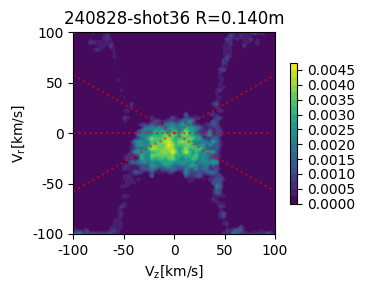

In [6]:
gd.v_dis_plot(f1, date, shot_in_the_date, pos_i)

In [ ]:
gd.vr_fitting(f1)

# Start working!!!

In [12]:
date = 240828
shot_in_the_date = 53

In [13]:
ts6.log_renewal('exp')

exp log successfully updated!!


In [14]:
# the ICCD camera paramters
delay, width, gain = idsp.shot_info(date, shot_in_the_date)

# the psi at the time when ICCD is triggered
psi = ts6.psi_at_t(date, shot_in_the_date, delay)

using local file.


In [15]:
vr = np.zeros(7)
vz = np.zeros(7)

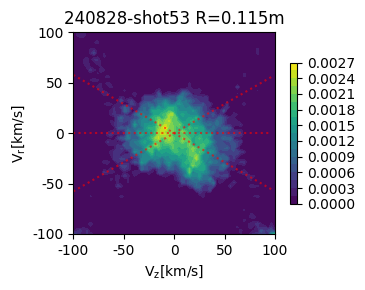

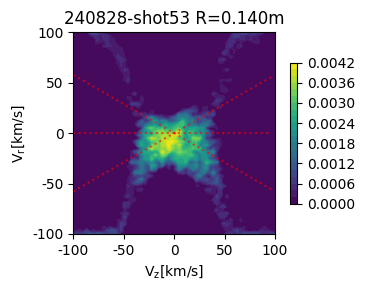

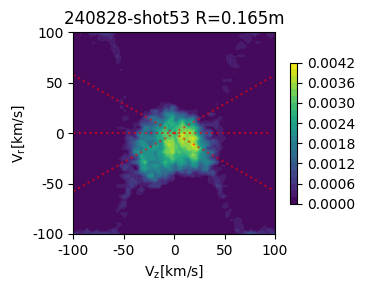

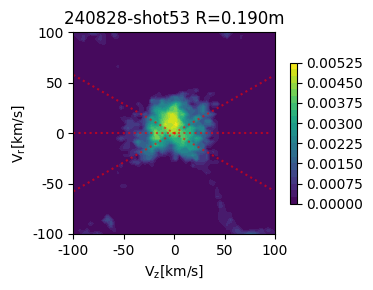

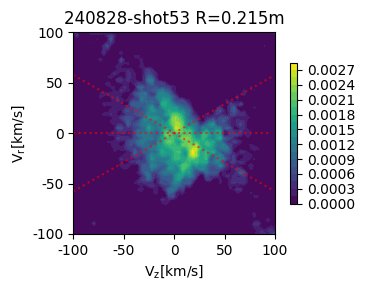

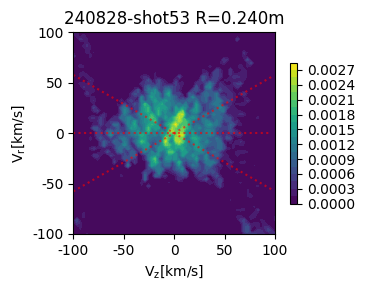

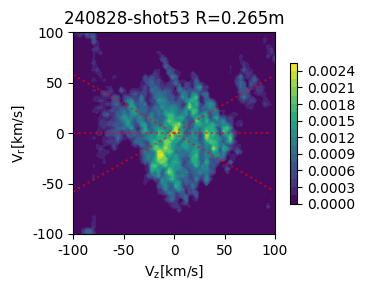

In [16]:
for i in range(7):
    f1 = gd.SIRT(date, shot_in_the_date, i+1, it=int(4e4))
    vr[i] = gd.vr_fitting(f1)
    vz[i] = gd.vz_fitting(f1)
    gd.v_dis_plot(f1, date, shot_in_the_date, i+1, show=False)
    # plt.gcf().savefig('./240906-IDSP result conclusion/%s-shot%s-delay%i-%i.png' %(date, shot_in_the_date, delay, i+1))

In [25]:
v = np.sqrt(vr ** 2 + vz ** 2)

In [26]:
r = idsp.IDSP_r(np.arange(1, 8))

In [27]:
z = np.ones(7) * 2.1e-2

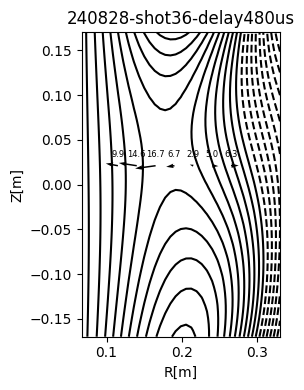

In [28]:
fig = plt.figure(figsize=[3, 4])

R, Z = ts6.RZ_mesh()
plt.contour(R[:, 1:], Z[:, 1:], psi.T, colors='k', levels=20)
plt.xlabel('R[m]')
plt.ylabel('Z[m]')

plt.quiver(r, z, vr, vz)

for i in range(7):
    plt.text(r[i], z[i]+0.01, '%.1f' %(v[i]/1000), ha='center', fontdict={'fontsize':6})

plt.title('%s-shot%s-delay%ius' %(date, shot_in_the_date, np.rint(delay)))

plt.tight_layout()


In [29]:
fig.savefig('./240906-IDSP result conclusion/%s-shot%s-delay%i-flow.png' %(date, shot_in_the_date, delay), dpi=600)